# Markov Networks
Markov networks are also called **Markov random fields**.

The simplest case is **pairwise Markov networks**. Formally, a *pairwise Markov Network* is an undirected graph whose nodes are $X_1,\ldots,X_n$ and each edge $X_i-X_j$ is associated with a factor (aka *potential*) $\phi_{ij}(X_i-X_j)$.

Pairwise Markov networks cannot represent all the probability distributions we may be interested in. A pairwise Markov network with $n$ random variables, each with $d$ values, has $O(n^2 d^2)$ parameters. On the other hand, if we consider a probability distribution over $n$ random variables, each with $d$ values, it has $O(d^n)$ parameters, which is far greater than $O(n^2d^2)$.

## Gibbs distribution

A **Gibbs distribution** is a parameterized by a set of general factors $\Phi = \{\phi_1(D_1),\ldots,\phi_k(D_k)\}$ which can have a scope of $\ge 2$ variables (whereas pairwise Markov networks were limited to two variable scopes). As a result, this can express any probability distribution because we can just define a fector over all the random variables.

We also have:
\begin{eqnarray}
\tilde{P}_\Phi(X_1,\ldots,X_n)  & = & \prod_{i=1}^k\phi_i(D_i) \\
Z_{\Phi} & = & \sum_{X1,\ldots,X_n}\tilde{P}_\Phi(X_1,\ldots,X_n)
\end{eqnarray}

where $Z_\Phi$ is the partition function, i.e. the normalizing constant.

Thus we have:

$$
P_\Phi(X_1,\ldots,X_n) = \frac{1}{Z_\Phi}\tilde{P}_\Phi(X_1,\ldots,X_n)
$$

We can generate an **induced Markov network** $H_\Phi$ from a set of factors $\Phi$. For each factor in the set, we connect any variables which are in the same scope.

We say a probability distribution $P$ factorizes over a Markov network $H$ if there exists a set of factor $\Phi$ such that $P=P_\Phi$ and $h$ is the induced graph for $\Phi$. 

We have **active trails** in Markov networks as well: a train $X_1-\cdots-X_n$ is active given the set of observed variables $Z$ if no $X_i$ is in $Z$.

## Conditional Random Fields

A commonly-used variant of Markov networks is **conditional random fields** (CRFs).

This kind of model is used to deal with *task-specific prediction*, where we have a set of input/observed variables $X$ and a set of target variables $Y$ that we are trying to predict.

Using the graphical models we have seen so far is not the best because we don't want to model $P(X, Y)$ - we are already given $X$. Instead, we just want to model $P(Y|X)$. That way we don't have to worry about how features of $X$ are correlated or independent, and we don't have to model their distributions.

In this scenario, we can use a *conditional random field* representation:
\begin{eqnarray}
\Phi & = & \{\phi_i(D_1),\ldots,\phi_k(D_k)\}\\
\tilde{P}_\Phi(X, Y) & = & \prod_{i=1}^k \phi_i(D_i)
\end{eqnarray}
This looks just like a Gibbs distribution. The difference is in the partition function:
$$
Z_\Phi(X) = \sum_Y\tilde{P}_\Phi(X, Y)
$$
So a CRF is parameterized the same as a Gibbs distribution, but it is normalized differently.

The end result is: 
$$
P_\Phi(Y|X) = \frac{1}{Z_\Phi(X)}\tilde{P}_\Phi(X, Y)
$$
which is a family of conditional distributions, one for each possible value of $X$.

In a Markov network, we have the concept of **separation**, which is like d-separation in Bayesian networks but we drop the 'd' because they are not directed.

$X$ and $Y$ are separated in $H$ given observed evidence $Z$ if there is no active trail in $H$ (that is, no node along the trail is in $Z$).

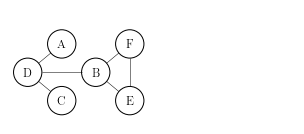

We can separate $A$ and $E$ in few ways:
* $A$ and $E$ are separated given $B$ and $D$
* $A$ and $E$ are separated given $D$
* $A$ and $E$ are separated given $B$ and $C$

Like with Bayesian networks, we have a theorem: if $P$ factorizes over $H$ and $\mathrm{sep}_H(X, Y | Z)$, then $P$ satisfies $X\perp Y|Z)$.